<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/Dl_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

fatal: destination path 'Project_DS' already exists and is not an empty directory.


In [16]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks
import numpy as np, joblib


In [6]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

In [7]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [8]:


# Load arrays
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
feature_cols     = data["feature_cols"].tolist()
classes          = data["classes"]

# Load encoder & scaler
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Data loaded successfully")
print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape, y_val.shape)
print("Test:",  X_test.shape, y_test.shape)
print("Classes:", classes)

✅ Data loaded successfully
Train: (4835, 6, 222) (4835,)
Val: (591, 6, 222) (591,)
Test: (590, 6, 222) (590,)
Classes: ['aggressive-scan' 'cryptojacking' 'icmp-flood' 'icmp-fragmentation'
 'icmp-fragmentation_old' 'none' 'os-fingerprinting' 'os-scan' 'port-scan'
 'push-ack-flood' 'serice-detection' 'service-detection' 'syn-flood'
 'syn-stealth' 'synonymous-ip-flood' 'tcp-flood' 'udp-flood' 'vuln-scan']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 64)             │        55,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,626 (236.82 KB)

 Trainable params: 60,626 (236.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5280 - loss: 1.8889 - val_accuracy: 0.6667 - val_loss: 0.9909
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6927 - loss: 0.9002 - val_accuracy: 0.7242 - val_loss: 0.7305
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7292 - loss: 0.7169 - val_accuracy: 0.7580 - val_loss: 0.6530
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7588 - loss: 0.6311 - val_accuracy: 0.7783 - val_loss: 0.6040
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7590 - loss: 0.6255 - val_accuracy: 0.7834 - val_loss: 0.5585
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7848 - loss: 0.5571 - val_accuracy: 0.8020 - val_loss: 0.5326
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7917 - loss: 0.5501 - val_accuracy: 0.8088 - val_loss: 0.4983
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8027 - loss: 0.4889 - val_accuracy: 0.8223 - v

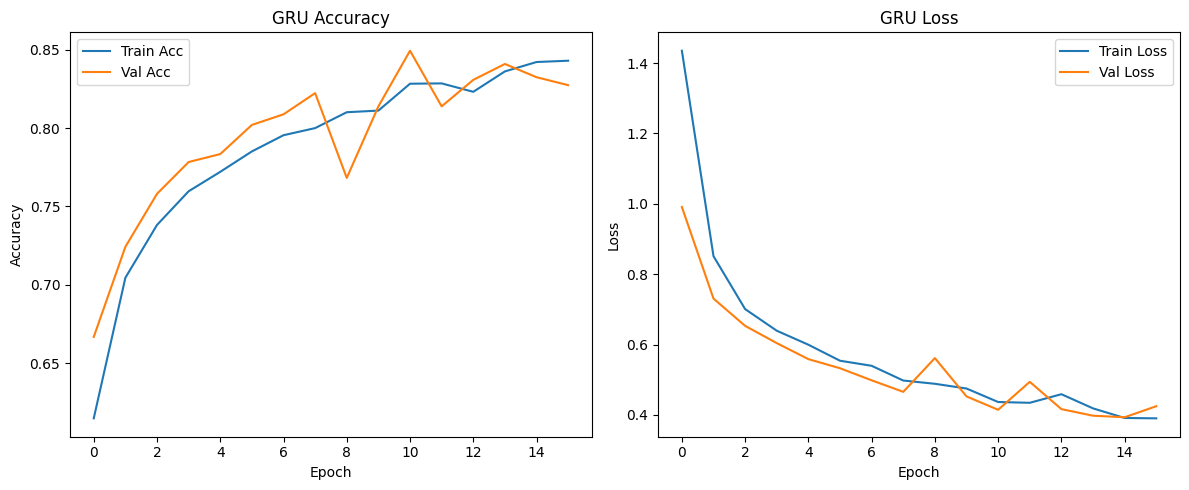

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

✅ GRU Results
Accuracy: 0.8440677966101695
Macro-F1: 0.55900012213418
                        precision    recall  f1-score   support

       aggressive-scan       0.36      0.56      0.43        18
         cryptojacking       1.00      1.00      1.00       165
            icmp-flood       0.68      1.00      0.81        13
    icmp-fragmentation       1.00      0.92      0.96        13
icmp-fragmentation_old       0.00      0.00      0.00         6
                  none       1.00      1.00      1.00       220
     os-fingerprinting       0.33      0.62      0.43        13
               os-scan       0.20      0.17      0.18         6
             port-scan       0.59      0.53      0.56        19
        push-ack-flood       0.92      1.00      0.96        12
      serice-detection       0.50      0.50      0.50         6
     service-detection       0.32      0.43      0.36        14
             syn-flood       1.00      0.92      0.96   

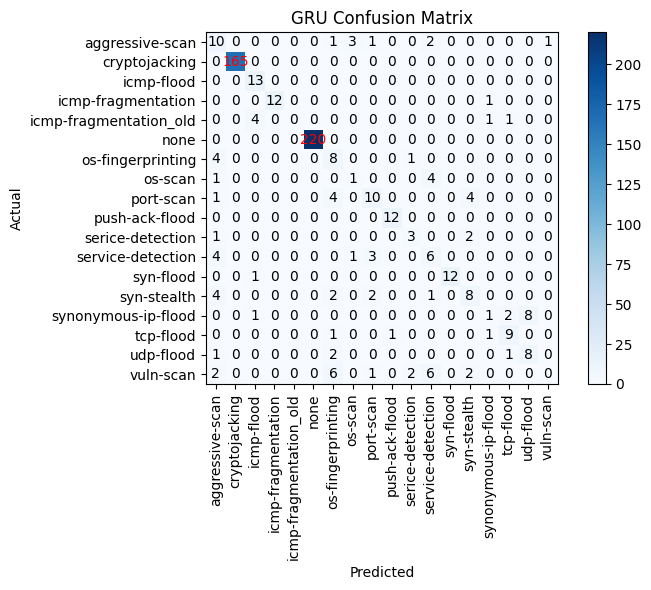

📂 Saved: GRU.keras, results_gru.json, GRU_training_curves.png, GRU_confusion_matrix.png


In [15]:
# -----------------------
# Build GRU model
# -----------------------
def build_gru(window, n_features, n_classes):
    model = models.Sequential([
        layers.Input(shape=(window, n_features)),
        layers.GRU(64, return_sequences=False),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(n_classes, activation="softmax")
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

gru_model = build_gru(X_train.shape[1], X_train.shape[2], len(classes))
gru_model.summary()

# -----------------------
# Train with EarlyStopping
# -----------------------
early_stop = callbacks.EarlyStopping(
    monitor="val_accuracy", patience=5, mode="max", restore_best_weights=True
)

history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------
# Plot Accuracy & Loss
# -----------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("GRU Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("GRU Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("GRU_training_curves.png")
plt.show()

# -----------------------
# Evaluate on Test Set
# -----------------------
y_pred_test = np.argmax(gru_model.predict(X_test), axis=-1)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average="macro")
report = classification_report(y_test, y_pred_test, target_names=classes, zero_division=0)
cm = confusion_matrix(y_test, y_pred_test)

print("\n✅ GRU Results")
print("Accuracy:", test_acc)
print("Macro-F1:", test_f1)
print(report)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap="Blues")
plt.title("GRU Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="red" if cm[i, j] > cm.max()/2 else "black")
plt.tight_layout()
plt.savefig("GRU_confusion_matrix.png")
plt.show()

# -----------------------
# Save model + results
# -----------------------
gru_model.save("GRU.keras")

results = {
    "accuracy": float(test_acc),
    "macro_f1": float(test_f1),
    "report": report,
    "confusion_matrix": cm.tolist()
}

with open("results_gru.json", "w") as f:
    json.dump(results, f, indent=4)

print("📂 Saved: GRU.keras, results_gru.json, GRU_training_curves.png, GRU_confusion_matrix.png")

In [ ]:
# Setup Git (first time only per machine)
!git config --global user.email "your_email@example.com"
!git config --global user.name "your_name"

# Save current notebook (from Colab)
!jupyter nbconvert --to notebook --execute my_notebook.ipynb --output trained_notebook.ipynb

# Push to GitHub
!git init
!git remote add origin https://github.com/USERNAME/REPO.git
!git add .
!git commit -m "Save DL model results"
!git branch -M main
!git push -u origin main
